# Notebook 0 - Exploratory Analysis

# Curso de Especialização em Data Science

## ITA - Instituto Tecnológico de Aeronáutica

## Trabalho de Conclusão de Curso

__CEDS Skin Cancer MNIST: HAM10000__

* Aluno: Lorenzo Cano Cesconetto

* Orientador: Filipe Verri

### 1. Setup constants

In [1]:
%matplotlib inline

In [2]:
from constants import *

### 2. Imports and notebook setup

In [3]:
# Set up multiple outputs for cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Printing with markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
# Default imports
import os
import random
import shutil
from send2trash import send2trash
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import cv2

### 3. Exploring data

In [5]:
img = plt.imread(os.path.join(DATA_ORIGINAL_DIR_PATH, 'HAM10000_images_part_1', 'ISIC_0024319.jpg'))
img.shape

(450, 600, 3)

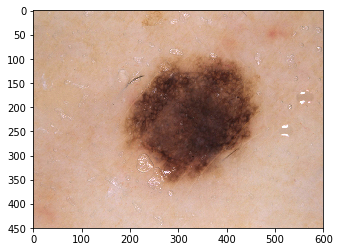

In [6]:
_ = plt.imshow(img)

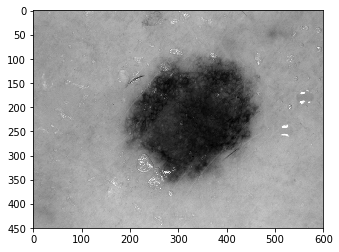

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ = plt.imshow(gray, cmap='gray')

(1024, 1024, 3)

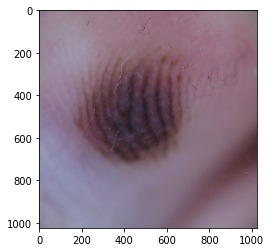

In [8]:
img = plt.imread(os.path.join(NEW_DATA_DIR_PATH, 'ISIC_2019_Training_Input', 'ISIC_0073251.jpg'))
img.shape
_ = plt.imshow(img)

In [9]:
df = pd.read_csv(os.path.join(DATA_ORIGINAL_DIR_PATH, 'HAM10000_metadata.csv'))
df.set_index('image_id', inplace=True)
print('Number of distinct lesions:', len(df.lesion_id.unique()))
print('Number of images:', len(df.index.unique()))
print('Number of lesions with multiple images:', sum(df.lesion_id.value_counts() > 1))
df.head()

Number of distinct lesions: 7470
Number of images: 10015
Number of lesions with multiple images: 1956


,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [10]:
df['dx'].value_counts() / len(df)
df.dx.value_counts()

nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: dx, dtype: float64

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [11]:
# Average number of images for each class
df.groupby('lesion_id').agg({'dx': lambda x: x[0], 'sex': 'count'}).groupby('dx').mean()

,sex
dx,
akiec,1.434211
bcc,1.571865
bkl,1.511692
df,1.575342
mel,1.812704
nv,1.240977
vasc,1.448980


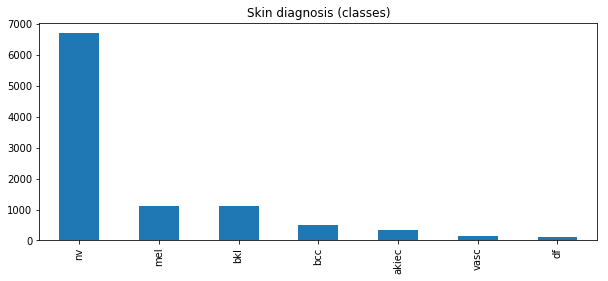

In [12]:
_ = df.dx.value_counts().plot(kind='bar', title='Skin diagnosis (classes)', figsize=(10, 4))

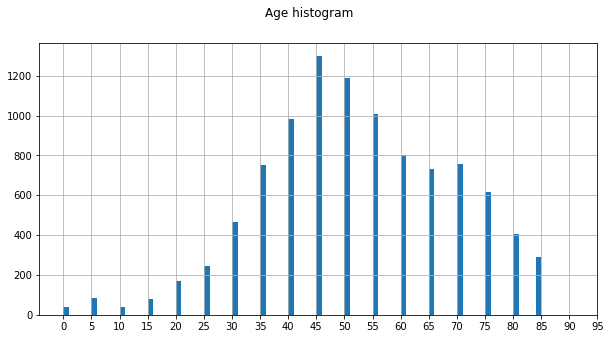

In [13]:
_ = df.age.hist(figsize=(10, 5), bins=range(0, 86))
_ = pl.suptitle('Age histogram')
_ = pl.xticks(np.arange(0, 100, step=5))

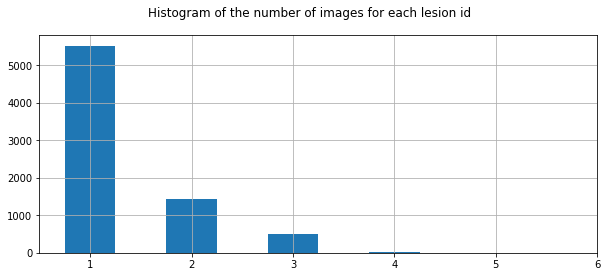

In [14]:
_ = (df.lesion_id.value_counts() - 0.25).hist(figsize=(10, 4))
_ = pl.suptitle('Histogram of the number of images for each lesion id')

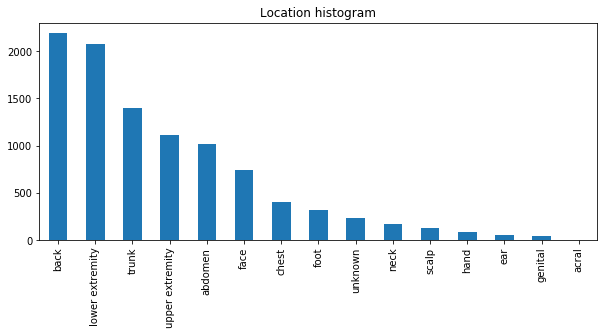

In [15]:
_ = df.localization.value_counts().plot(kind='bar', title='Location histogram', figsize=(10, 4))

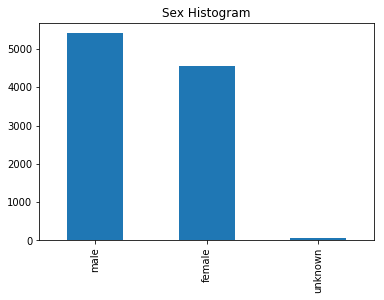

In [16]:
_ = df.sex.value_counts().plot(kind='bar', title='Sex Histogram')

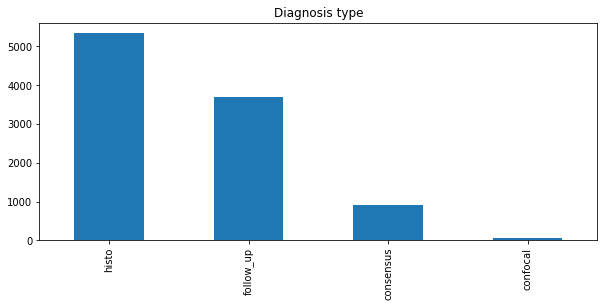

In [17]:
_ = df.dx_type.value_counts().plot(kind='bar', title='Diagnosis type', figsize=(10, 4))